# Minst Number Recognition

In [1]:
from sklearn.datasets import fetch_openml
from sklearn import __version__
print(__version__)

1.3.0


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)
mnist 

C:\Users\tienweihsu\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


In [8]:
y[0]

'5'

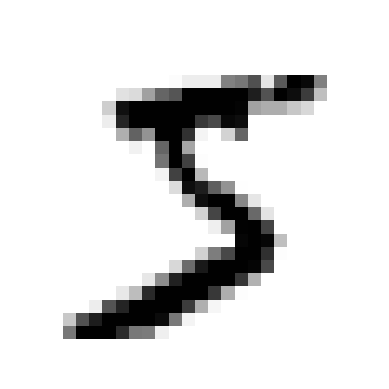

In [9]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train=="5")
y_test_5 = (y_test=="5")

### SGD 隨機梯度下降

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])


array([ True])

### performance index

#### K-fold

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [16]:
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    
    

0.95035
0.96035
0.9604


### Cross val predict

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
### we can se 53892 predcit to 5 is correct,predict 3530 is not 5 
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [19]:
# a perfect SGD only has TP, NF but it is not real.
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3530 / (687+3530)
## when picture is 5, its accuracy is only 83%

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred) # == 3530 / (1891+3530)
## and it only recongize 65% of 5

0.6511713705958311

### F1 score

In [22]:
# we combine percision score and recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
"""
Precision 高，Recall 低： 这种情况通常表示模型对预测为正类的样本非常有信心，但可能会漏掉一些实际为正类的样本。
Recall 高，Precision 低： 这种情况通常表示模型尽可能多地识别出正类样本，但可能会误将一些负类样本预测为正类。
"""

'\nPrecision 高，Recall 低： 这种情况通常表示模型对预测为正类的样本非常有信心，但可能会漏掉一些实际为正类的样本。\nRecall 高，Precision 低： 这种情况通常表示模型尽可能多地识别出正类样本，但可能会误将一些负类样本预测为正类。\n'

In [23]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 

array([ True])

In [26]:
threshold= 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
### so we can find if we increase threshold, it will reduce the recall, the pic is 5 but when threshold 3000, it can not detect it.

array([False])

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")


In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
# we use this func to calculate all recall and percision

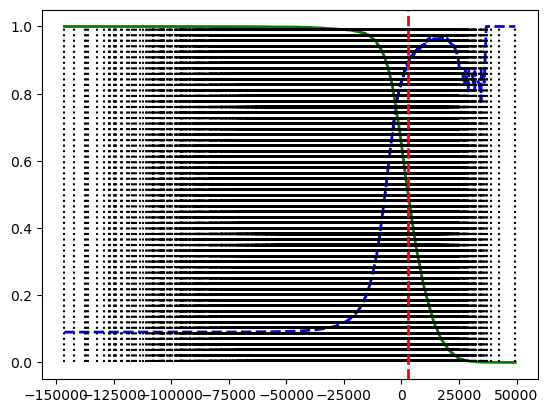

In [29]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")
plt.axvline(x=3000, color='r', linestyle='--', linewidth=2, label='Threshold = 3000')
plt.show()

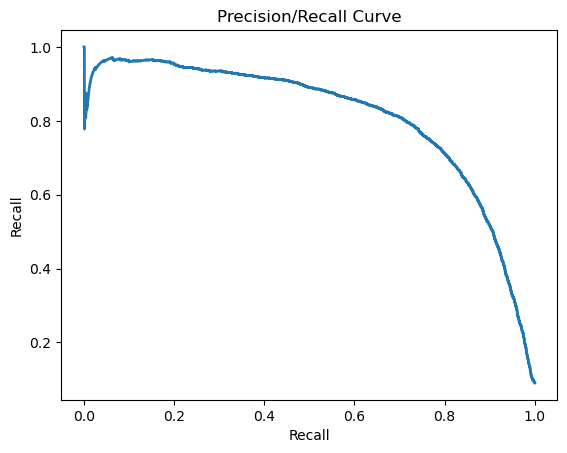

In [30]:
plt.plot(recalls, precisions, linewidth=2, label ="Precision/Recall Curve")

plt.title("Precision/Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Recall")
plt.show()

In [31]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision 

3370.0194991439557

In [32]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [33]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision
# 90 % classfier with 48% recall

0.4799852425751706

### ROC (Receiver operating characteristic)

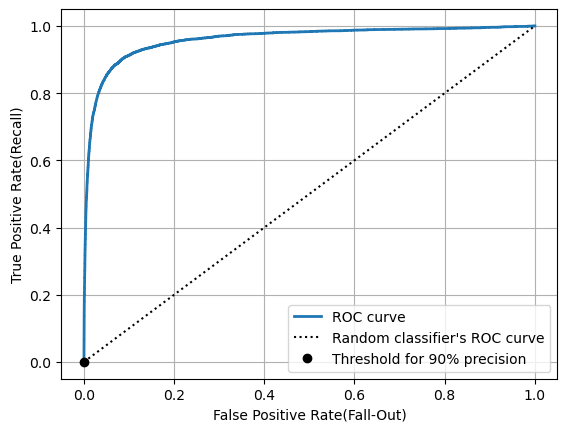

In [34]:
## ROC focus on true positive rate, false positive rate
"""
TPR（True Positive Rate）/Recall/灵敏度： 模型正确预测的正例占所有实际正例的比例。
FPR（False Positive Rate）： 模型错误预测为正例的负例占所有实际负例的比例。
"""
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (threshold <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# 偽陽率 vs 真陽率
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1], [0,1], "k:",label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.ylabel("True Positive Rate(Recall)")
plt.xlabel("False Positive Rate(Fall-Out)")
plt.grid()#網格
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)
"""
recall is higher, FPR is higher too, one way is we see the are under the curve(AUC)
"""

'\nrecall is higher, FPR is higher too, one way is we see the are under the curve(AUC)\n'

### RandomForestClassifier

In [36]:
"""
we use PR and f1 to compare with SGDClassifier,
precision_recall_curve() expect to recevie labels and each sample's score so we need to train the RFC,
but RFC did not have decision_function() we can just use predict_proba()
so we can just use positive to do score, we can just call cross_val_predict()
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
"""
lets see first 2 picture probability
"""

'\nlets see first 2 picture probability\n'

In [37]:
y_probas_forest[:2]
"""
first picture 89% is positive
second picture 99% is negative
"""

'\nfirst picture 89% is positive\nsecond picture 99% is negative\n'

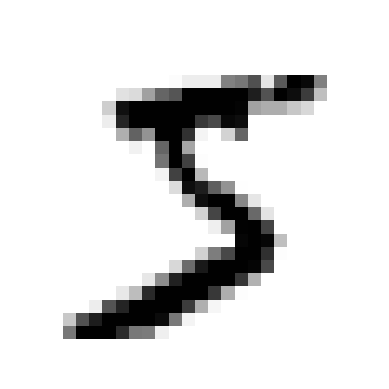

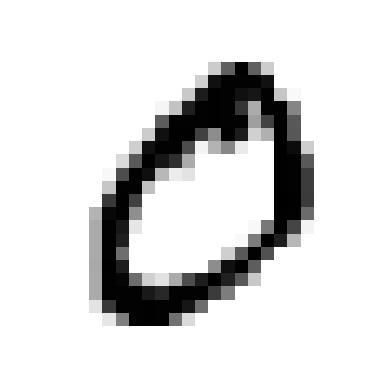

In [38]:
plot_digit(X_train[0])
plt.show()
plot_digit(X_train[1])
plt.show()

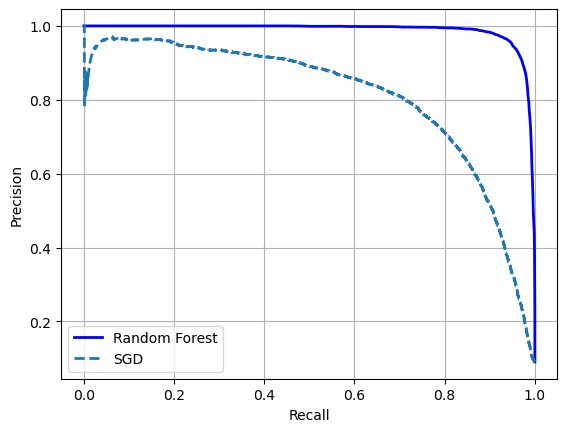

'\nwe can find that RFC is better than SGD because it has more AUC\n'

In [39]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
# PR Curve
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.grid()
plt.legend()
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()
"""
we can find that RFC is better than SGD because it has more AUC
"""

In [40]:
# F1 score
y_train_pred_forest = y_probas_forest[:, 1]>=0.5
f1_score(y_train_5, y_train_pred_forest)
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [41]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

### Multinomial classifier

In [42]:
"""
Some Scikit-Learn can deal several categories (LogisticRegression, RandomForestClassifier, GaussianNB)
SVC default is OVR
"""
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # we use first 2000 picture to train

SVC(random_state=42)

#### One vs One

In [43]:
# X[0]
svm_clf.predict([some_digit])
# it is right the code actually did 45 predict, and choose the highest one,

array(['5'], dtype=object)

In [44]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)
# we can see that array[5] is highest score 9.3 

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [45]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [46]:
class_id = some_digit_scores.argmax()
svm_clf.classes_[class_id]


'5'

['2']


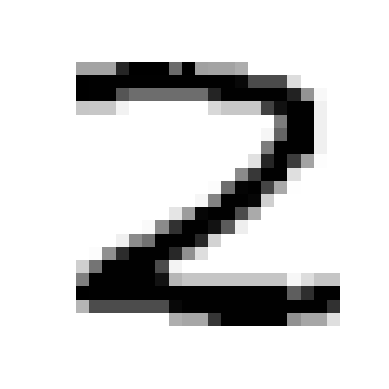

In [47]:
# try the other one
print(svm_clf.predict([X[220]]))
plot_digit(X[220])
plt.show()
# correct

In [48]:
# OneVsOneClassifier and OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [49]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [50]:
len(ovr_clf.estimators_)

10

#### One vs Rest

In [51]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
# lets try sgd

SGDClassifier(random_state=42)

In [52]:
sgd_clf.predict([some_digit])
# the predict is wrong

array(['3'], dtype='<U1')

In [53]:
"""
It's prediction is wrong because OvR in Scikit-Learn only trained 10 binary classifiers,
Lets see the score of all categories.
"""
sgd_clf.decision_function([some_digit]).round()


array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [54]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [56]:
# we adjust the input size to get a higher accuracy
# if your notebook is not good do not use float64, it needs more times
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error analysis 

In [57]:
"""
If this is a real case, you should fellow the Machine Learning check list to do it,
prepare several models, and choose the best one and use the GridSearchCV to micro-adjust their Hyperparameters,
and basically automatication, if we find a potenticail model and try to improve it, one way is analysis its error.
"""

'\nIf this is a real case, you should fellow the Machine Learning check list to do it,\nprepare several models, and choose the best one and use the GridSearchCV to micro-adjust their Hyperparameters,\nand basically automatication, if we find a potenticail model and try to improve it, one way is analysis its error.\n'

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

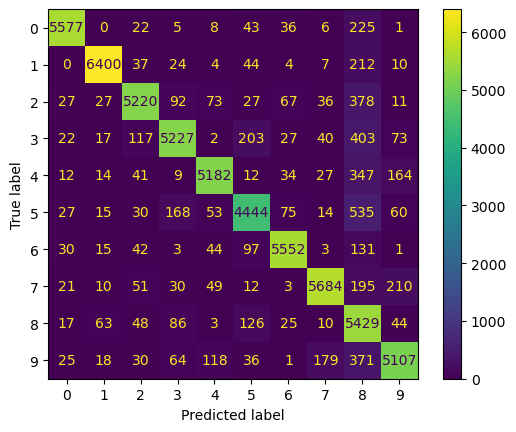

In [59]:
# use a color Confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


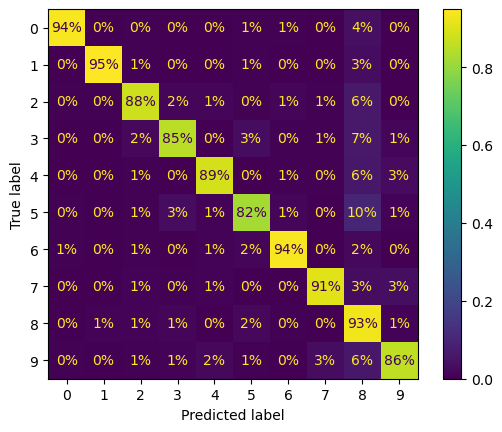

In [60]:
# we use this to generate the CM, values_format is no %, 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize ="true", values_format=".0%")
plt.show()

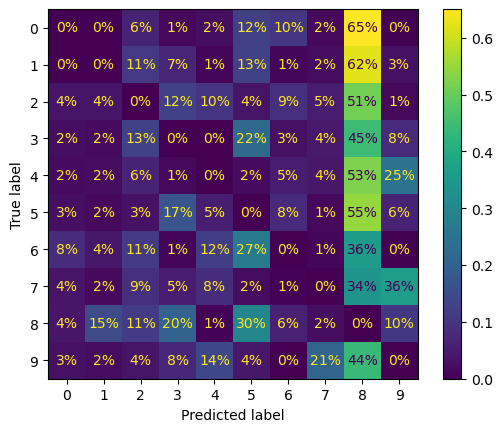

In [61]:
### only shows the error prediction CM
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, 
                                        normalize ="true", values_format=".0%")
plt.show()

## Many errors are concluded to 8

In [87]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)]
## we use individual analysis to know why it wrong, we can see that many 3 are predicted as 5 because they are very ugly;
import numpy as np
import matplotlib
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]

    ########
    if images_per_row == 0:
       images_per_row = 0.1
    else:
        images_per_row = images_per_row
        pass
    ########

    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

# one solution is we use some translation picture to train the models, we called Data Augmentation

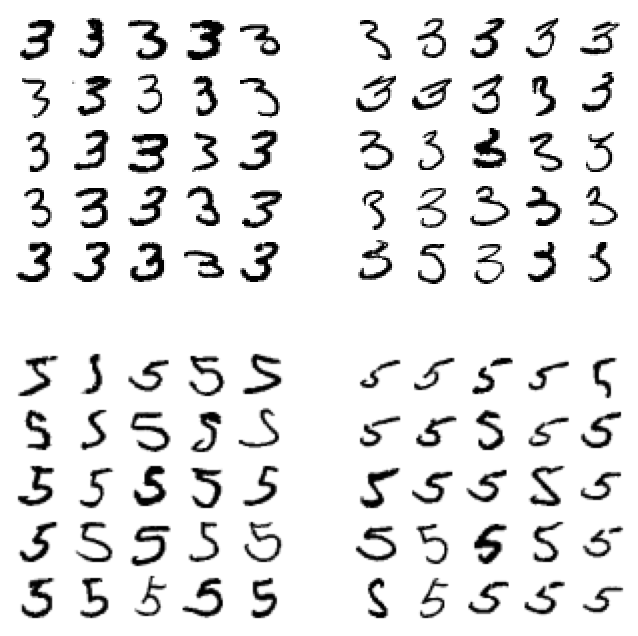

In [97]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(2,2,2); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(2,2,3); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(2,2,4); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multiple Labels classification

In [96]:
"""
like Human face classifiers, it will predict many faces in a picture,
this output several binary labels we called multiple label classifiers
"""
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # np.c_ combine np.array

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [98]:
knn_clf.predict([some_digit])
# it output 2 labels, and its correct, 5 is not > than 7 and it is odd

array([[False,  True]])

In [99]:
# we can also use CVP to find F1 score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.976410265560605

In [103]:
# ChianClassifier can do this, in default, it will use "true" label to train
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [104]:
chain_clf.predict([some_digit])

array([[0., 1.]])

## Multiple output classifier

In [106]:
import numpy as np

np.random.seed(42)
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test


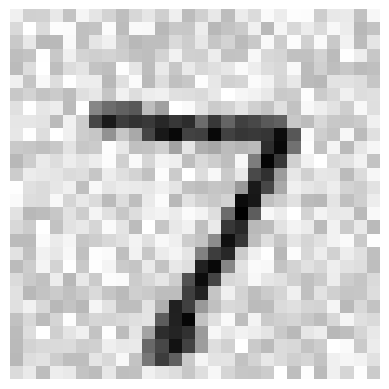

In [112]:
plot_digit(X_test_mod[0])
plt.show()

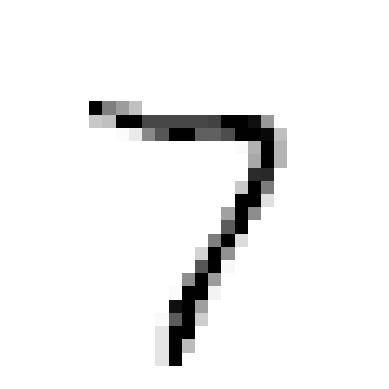

In [113]:
# lets use knn to clean the picture
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod) # X_trian_mod is noise, and y_train_mod is clean, lets train
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()
# it is very close to the goal, we clean the noise

# Pratice 1

In [128]:
# try to control hyperparameter to make accuracy higher than 97%
knn_clf = KNeighborsClassifier(n_neighbors=15, # smaller means it will more sensetive to noise
                               weights='distance', # distance? uniform
                               )
knn_clf.fit(X_train, y_train)

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_s=f1_score(y_train, y_train_knn_pred, average="macro")
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_train_knn_pred)
print(f"F1 score: {f1_s}", f"Accuracy: {accuracy}")

F1 score: 0.9612800614298707 Accuracy: 0.9614


# Pratice 4

In [ ]:
# Apache SpamAssassin